In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("/content/drive/MyDrive/fdm-project/waterQuality1.csv")

#removes rows that contain missing values
data.replace('#NUM!', pd.NA, inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

print(data)

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7991       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01      10     0.01    2.00    0.000        2.00      0.00   
7995       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05

In [4]:
# shape of the dataset(number of rows and columns)
data.shape

(7996, 21)

In [5]:
# dataset details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

0    7084
1     912
Name: is_safe, dtype: int64


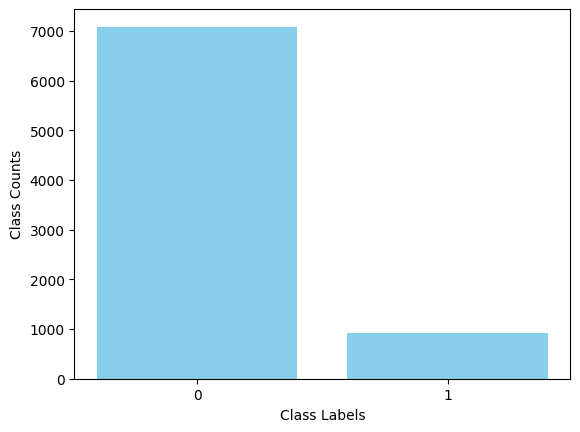

In [6]:
y_val_counts=data['is_safe'].value_counts()
print(y_val_counts)

import matplotlib.pyplot as plt

plt.bar(y_val_counts.index, y_val_counts.values, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Class Counts')
plt.show()


In [7]:
X=data.drop(columns=['is_safe'])
y=data['is_safe']

from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy=0.5)

X,y=sm.fit_resample(X,y)

In [8]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(sampling_strategy='auto', random_state=42, n_neighbors=1, n_jobs=-1)
X_resampled, y_resampled = cnn.fit_resample(X, y)


1    3542
0    1747
Name: is_safe, dtype: int64


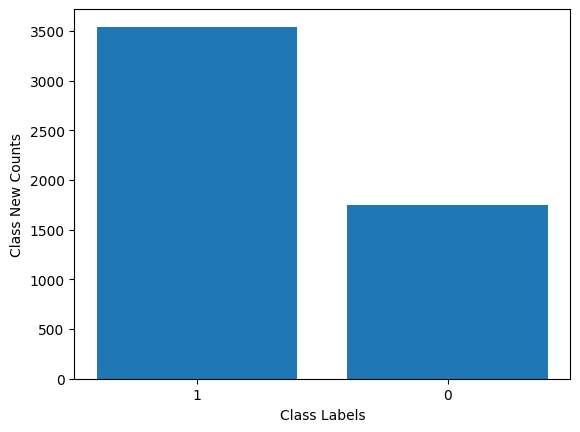

In [9]:
y_new_count=y_resampled.value_counts()
print(y_new_count)

plt.bar(y_new_count.index, y_new_count.values )
plt.xlabel('Class Labels')
plt.ylabel('Class New Counts')
plt.show()

In [10]:
import numpy as np
x=X_resampled.to_numpy()
y=y_resampled.to_numpy()

In [11]:
# divide dataset into training and testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

print(x_train.shape)
print(y_train.shape)

(3966, 20)
(3966,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

#Define the hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,10,20,30,40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.01, 0.1, 1.0]
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid =param_grid , cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(x_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(x_test, y_test)
print("Testing Accuracy:", accuracy)


p1 = best_model.predict(x_test)
print(p1)
from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test, p1)

Best Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Testing Accuracy: 0.8828420256991686
['0' '1' '1' ... '1' '0' '0']


In [13]:
p2 = best_model.predict(x_train)
print(p2)
from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_train, p2)

['1' '1' '0' ... '1' '1' '0']


In [14]:
# Convert accuracy to a percentage
accuracy_percentage1 = a1 * 100
accuracy_percentage2 = a2 * 100

print("Training Accuracy2: {:.2f}%".format(accuracy_percentage2))
print("Testing Accuracy1: {:.2f}%".format(accuracy_percentage1))

Training Accuracy2: 89.36%
Testing Accuracy1: 88.28%


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_train_pred=best_model.predict(x_train)

training_accuracy=accuracy_score(y_train, y_train_pred)
print(f"training accuracy: {training_accuracy*100}")

#print(f"cross validation accruracies: {grid_search.cv_results_['mean_test_score']}")

print(f"nest parameters:{best_params}")

y_pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)

print(f"Model accuracy score:{accuracy*100}")

print(f"{classification_report(y_test, y_pred)}")



training accuracy: 89.35955622793746
nest parameters:{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model accuracy score:88.28420256991686
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       471
           1       0.89      0.93      0.91       852

    accuracy                           0.88      1323
   macro avg       0.88      0.86      0.87      1323
weighted avg       0.88      0.88      0.88      1323



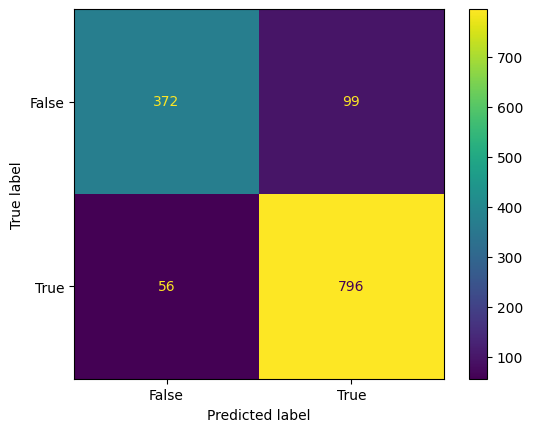

In [16]:
conf_mtrx=confusion_matrix(y_test, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay

conf_mtrx_display=ConfusionMatrixDisplay(confusion_matrix = conf_mtrx, display_labels = [False, True])
conf_mtrx_display.plot()
plt.show()

In [17]:
new_pred=[0.1, 0.5, 0.7, 0.8, 0.25, 0.75, 0.35, 8.5, 12.5, 11.5, 1.2, 1.7, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]
new_pred=np.array(new_pred)

print(best_model.predict(new_pred.reshape(1, -1)))

['0']


In [18]:
# Assuming you've already trained your Decision Tree model and named it 'model'
input_data = [[1.6, 9.0, 0.01, 2.0, 0.006, 0.3, 0.8, 0.1, 0.05, 0.3, 0.1, 0.1, 10.0, 1.0, 0.005, 30.0, 5.0, 0.1, 0.3, 0.01]]

# Get the predicted output
predicted_output = best_model.predict(input_data)

# Print the predicted output
print(predicted_output)


['1']


In [19]:
pip install joblib

In [20]:
import joblib

# Save the model to a .pkl file
joblib.dump(best_model, '/content/drive/MyDrive/fdm-project/DTmodel.pkl')


['/content/drive/MyDrive/fdm-project/DTmodel.pkl']